In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

In [77]:
raw_solar = pd.read_csv("/content/drive/MyDrive/제주 에너지 이노베이터/data/2021~2022 태양광, 풍력 시간별 데이터.csv")

In [78]:
raw_solar

,거래일자,거래시간,지역,태양광 발전량(MWh),풍력 발전량(MWh)
0,2021-01-01,1.0,제주도,0,119.64
1,2021-01-01,2.0,제주도,0,105.18
2,2021-01-01,3.0,제주도,0,106.19
3,2021-01-01,4.0,제주도,0,76.71
4,2021-01-01,5.0,제주도,0.01,65.16
...,...,...,...,...,...
18931,NaN,NaN,NaN,NaN,NaN
18932,NaN,NaN,NaN,NaN,NaN
18933,NaN,NaN,NaN,NaN,NaN
18934,NaN,NaN,NaN,NaN,NaN


In [79]:
# NaN 값이 있는 행 삭제
raw_solar = raw_solar.dropna(how='all')

# 거래일자를 date로, 거래시간을 hour로 변경
raw_solar['거래일자'] = pd.to_datetime(raw_solar['거래일자'])
raw_solar['거래시간'] = raw_solar['거래시간'].astype(int)

# 컬럼 이름 수정
raw_solar = raw_solar.rename(columns={'거래일자': 'date', '거래시간': 'hour'})

# 결과 확인
raw_solar

<ipython-input-79-8987a08ae4e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_solar['거래일자'] = pd.to_datetime(raw_solar['거래일자'])
<ipython-input-79-8987a08ae4e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_solar['거래시간'] = raw_solar['거래시간'].astype(int)


,date,hour,지역,태양광 발전량(MWh),풍력 발전량(MWh)
0,2021-01-01,1,제주도,0,119.64
1,2021-01-01,2,제주도,0,105.18
2,2021-01-01,3,제주도,0,106.19
3,2021-01-01,4,제주도,0,76.71
4,2021-01-01,5,제주도,0.01,65.16
...,...,...,...,...,...
17515,2022-12-31,20,제주도,7.83,75.43
17516,2022-12-31,21,제주도,7.22,71.47
17517,2022-12-31,22,제주도,3.75,52.17
17518,2022-12-31,23,제주도,0.66,42.18


In [80]:
# 4번째 열의 이름을 solar_energy로 변경
raw_solar = raw_solar.rename(columns={raw_solar.columns[3]: 'solar_energy'})

# 3번째 열과 5번째 열을 삭제
raw_solar = raw_solar.drop([raw_solar.columns[2], raw_solar.columns[4]], axis=1)

In [81]:
raw_solar

,date,hour,solar_energy
0,2021-01-01,1,0
1,2021-01-01,2,0
2,2021-01-01,3,0
3,2021-01-01,4,0
4,2021-01-01,5,0.01
...,...,...,...
17515,2022-12-31,20,7.83
17516,2022-12-31,21,7.22
17517,2022-12-31,22,3.75
17518,2022-12-31,23,0.66


In [84]:
raw_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 17519
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          17520 non-null  datetime64[ns]
 1   hour          17520 non-null  int64         
 2   solar_energy  17520 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 547.5+ KB


In [85]:
raw_solar['solar_energy'] = pd.to_numeric(raw_solar['solar_energy'], errors='coerce')

In [86]:
raw_solar.describe()

,hour,solar_energy
count,17520.000000,17491.000000
mean,12.500000,43.990145
std,6.922384,64.569374
min,1.000000,0.000000
25%,6.750000,0.250000
50%,12.500000,6.630000
75%,18.250000,70.085000
max,24.000000,263.130000


# 결측치 확인

In [83]:
nan_info = raw_solar.isnull().sum()
print(nan_info)

date            0
hour            0
solar_energy    0
dtype: int64


# 시각화

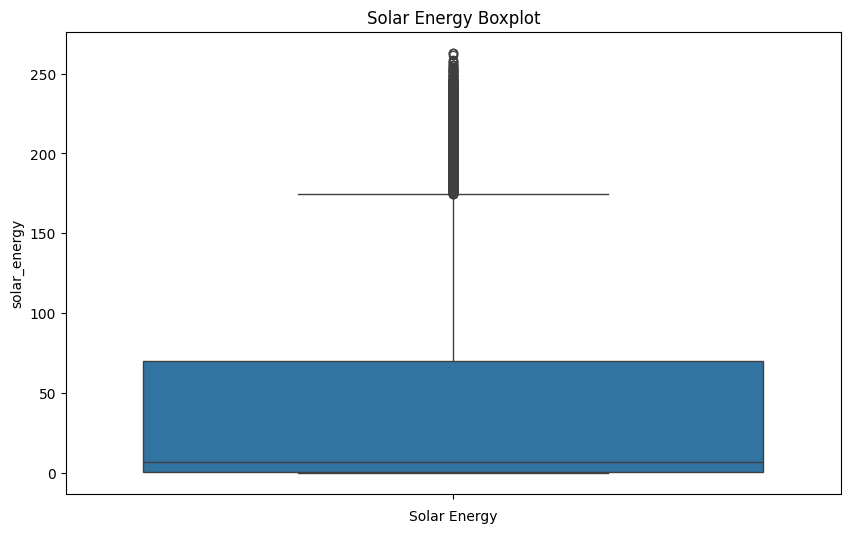

In [87]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(raw_solar['solar_energy'])
plt.title('Solar Energy Boxplot')
plt.xlabel('Solar Energy')
plt.show()

# 데이터 다운로드

In [88]:
raw_solar.to_csv('solar_energy_df.csv', index=False)